## Import Library

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from google.colab import drive
from datetime import datetime
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# Load Dataset

In [74]:
drive.mount('/content/drive')

# load from gdrive
dataset = '/content/drive/My Drive/01. Kuliah/Magang/KP/Peoject KP/Analisis-Penjualan-Fashion-Tilang/dataset-1-KP.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
#load Dataset
df = pd.read_csv(dataset, encoding='UTF-8-SIG')

In [76]:
df.head(5)

,Order ID,Order Status,Order Substatus,Cancelation/Return Type,Normal or Pre-order,SKU ID,Seller SKU,Product Name,Variation,Quantity,Sku Quantity of return,SKU Unit Original Price,SKU Subtotal Before Discount,SKU Platform Discount,SKU Seller Discount,SKU Subtotal After Discount,Shipping Fee After Discount,Original Shipping Fee,Shipping Fee Seller Discount,Shipping Fee Platform Discount,Payment platform discount,Buyer Service Fee,Taxes,Order Amount,Order Refund Amount,Created Time,Paid Time,RTS Time,Shipped Time,Delivered Time,Cancelled Time,Cancel By,Cancel Reason,Fulfillment Type,Warehouse Name,Tracking ID,Delivery Option,Shipping Provider Name,Buyer Message,Buyer Username,Recipient,Phone #,Zipcode,Country,Province,Regency and City,Districts,Villages,Detail Address,Additional address information,Payment Method,Weight(kg),Product Category,Package ID,Seller Note,Checked Status,Checked Marked by
0,577066577177642591,Shipped,In Transit,NaN,Normal,1729668342918710874,NaN,T-Shirt Kaos Polos Pria Wanita Unisex Tilang I...,"Blue Denim, XL",1,0,IDR 120.000,IDR 120.000,IDR 7.000,IDR 30.001,IDR 82.999,IDR 9.500,IDR 9.500,IDR 0,IDR 0,NaN,IDR 900,IDR 0,IDR 93.399,NaN,27/07/2024 13:13:52\t,\t,27/07/2024 14:28:29\t,27/07/2024 17:59:12\t,\t,\t,NaN,NaN,Fulfillment by seller,ID Pickup Warehouse,JX2645738436,Pengiriman standar,J&T Express,NaN,kamarkloo,K*****,(+62)812******90,\t,Indonesia,Jawa Barat,Kota Tasikmalaya,Ma********,De** **********,Pe*** ***** ********** **********,no ** ** *****,Bayar di tempat,0.020,T-shirts,1154259769080972895\t,NaN,Unchecked,NaN
1,577066535526761897,Shipped,Delivered,NaN,Normal,1729668342918710874,NaN,T-Shirt Kaos Polos Pria Wanita Unisex Tilang I...,"Blue Denim, XL",1,0,IDR 120.000,IDR 120.000,IDR 7.200,IDR 30.001,IDR 82.799,IDR 9.500,IDR 9.500,IDR 0,IDR 0,NaN,IDR 1.000,IDR 0,IDR 93.299,NaN,27/07/2024 12:58:51\t,28/07/2024 14:09:53\t,27/07/2024 14:28:29\t,27/07/2024 17:59:11\t,28/07/2024 14:09:53\t,\t,NaN,NaN,Fulfillment by seller,ID Pickup Warehouse,JX2647718436,Pengiriman standar,J&T Express,NaN,mildasoft,M****,(+62)878******81,\t,Indonesia,Jawa Barat,Kota Tasikmalaya,Bu********,Ci**********,Me** ******* ***** ******* **** ***,NaN,Bayar di tempat,0.020,T-shirts,1154259518675387817\t,NaN,Unchecked,NaN
2,577066491222591233,Shipped,In Transit,NaN,Normal,1729649019553810010,200.0,T-Shirt Oversize Punk Unisex Tilang Indonesia ...,"HItam, M",1,0,IDR 135.000,IDR 135.000,IDR 7.000,IDR 28.350,IDR 99.650,IDR 9.500,IDR 9.500,IDR 0,IDR 0,NaN,IDR 0,IDR 0,IDR 109.150,NaN,27/07/2024 12:39:55\t,\t,27/07/2024 14:28:29\t,27/07/2024 17:59:12\t,\t,\t,NaN,NaN,Fulfillment by seller,ID Pickup Warehouse,JX2647738436,Pengiriman standar,J&T Express,NaN,ikasulastri23,I** S*******,(+62)852******70,\t,Indonesia,Jawa Barat,Kota Tasikmalaya,Ci*******,Ko******,se***** ****** ** ******* **** *** ***** ** **...,ru*** *** ***** *** ** ** ** ****,Bayar di tempat,0.025,T-shirts,1154259374383269633\t,NaN,Unchecked,NaN
3,577055538496308305,Shipped,Delivered,NaN,Normal,1729669708476941914,NaN,T-Shirt Kaos Polos Pria Wanita Unisex Tilang I...,"Hitam, XL",1,0,IDR 120.000,IDR 120.000,IDR 7.000,IDR 30.001,IDR 82.999,IDR 36.500,IDR 36.500,IDR 0,IDR 0,NaN,IDR 0,IDR 0,IDR 119.499,NaN,23/07/2024 16:41:12\t,23/07/2024 16:42:00\t,23/07/2024 16:42:35\t,23/07/2024 17:56:27\t,25/07/2024 08:26:25\t,\t,NaN,NaN,Fulfillment by seller,ID Pickup Warehouse,JX2635989127,Pengiriman standar,J&T Express,NaN,nurcahyo468,M** N******* S******,(+62)881*****07,\t,Indonesia,Jawa Timur,Tuban,Se*******,Pe*********,ds********* **********,NaN,Virtual account transfer,0.020,T-shirts,1154216697779684433\t,NaN,Unchecked,NaN
4,577055274425812627,Shipped,Delivered,NaN,Normal,1729668310609331802,NaN,T-Shirt Baju Raja Jalanan Tilang Indonesia Vol. 1,L,1,0,IDR 147.000,IDR 147.000,IDR 7.000,IDR 48.001,IDR 91.999,IDR 11.500,IDR 11.500,IDR 0,IDR 0,NaN,IDR 0,IDR 0,IDR 103.499,NaN,23/07/2024 14:40:33\t,23/07/2024 14:41:34\t,23/07/2024 14:54:50\t,23/07/2024 17:56:31\t,24/07/2024 15:11:43\t,\t,NaN

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Order ID                        149 non-null    int64  
 1   Order Status                    149 non-null    object 
 2   Order Substatus                 149 non-null    object 
 3   Cancelation/Return Type         14 non-null     object 
 4   Normal or Pre-order             149 non-null    object 
 5   SKU ID                          149 non-null    int64  
 6   Seller SKU                      92 non-null     float64
 7   Product Name                    149 non-null    object 
 8   Variation                       149 non-null    object 
 9   Quantity                        149 non-null    int64  
 10  Sku Quantity of return          149 non-null    int64  
 11  SKU Unit Original Price         149 non-null    object 
 12  SKU Subtotal Before Discount    149 

# Data Cleaning

## Filtering

In [78]:
# menghapus kolom yang tidak relevan
df_clean = df.drop(columns=['Order ID', 'Seller SKU', 'Tracking ID',
                            'Cancelation/Return Type', 'Seller Note',
                            'Checked Marked by'], errors='ignore')

In [79]:
df_clean.head()

,Order Status,Order Substatus,Normal or Pre-order,SKU ID,Product Name,Variation,Quantity,Sku Quantity of return,SKU Unit Original Price,SKU Subtotal Before Discount,SKU Platform Discount,SKU Seller Discount,SKU Subtotal After Discount,Shipping Fee After Discount,Original Shipping Fee,Shipping Fee Seller Discount,Shipping Fee Platform Discount,Payment platform discount,Buyer Service Fee,Taxes,Order Amount,Order Refund Amount,Created Time,Paid Time,RTS Time,Shipped Time,Delivered Time,Cancelled Time,Cancel By,Cancel Reason,Fulfillment Type,Warehouse Name,Delivery Option,Shipping Provider Name,Buyer Message,Buyer Username,Recipient,Phone #,Zipcode,Country,Province,Regency and City,Districts,Villages,Detail Address,Additional address information,Payment Method,Weight(kg),Product Category,Package ID,Checked Status
0,Shipped,In Transit,Normal,1729668342918710874,T-Shirt Kaos Polos Pria Wanita Unisex Tilang I...,"Blue Denim, XL",1,0,IDR 120.000,IDR 120.000,IDR 7.000,IDR 30.001,IDR 82.999,IDR 9.500,IDR 9.500,IDR 0,IDR 0,NaN,IDR 900,IDR 0,IDR 93.399,NaN,27/07/2024 13:13:52\t,\t,27/07/2024 14:28:29\t,27/07/2024 17:59:12\t,\t,\t,NaN,NaN,Fulfillment by seller,ID Pickup Warehouse,Pengiriman standar,J&T Express,NaN,kamarkloo,K*****,(+62)812******90,\t,Indonesia,Jawa Barat,Kota Tasikmalaya,Ma********,De** **********,Pe*** ***** ********** **********,no ** ** *****,Bayar di tempat,0.020,T-shirts,1154259769080972895\t,Unchecked
1,Shipped,Delivered,Normal,1729668342918710874,T-Shirt Kaos Polos Pria Wanita Unisex Tilang I...,"Blue Denim, XL",1,0,IDR 120.000,IDR 120.000,IDR 7.200,IDR 30.001,IDR 82.799,IDR 9.500,IDR 9.500,IDR 0,IDR 0,NaN,IDR 1.000,IDR 0,IDR 93.299,NaN,27/07/2024 12:58:51\t,28/07/2024 14:09:53\t,27/07/2024 14:28:29\t,27/07/2024 17:59:11\t,28/07/2024 14:09:53\t,\t,NaN,NaN,Fulfillment by seller,ID Pickup Warehouse,Pengiriman standar,J&T Express,NaN,mildasoft,M****,(+62)878******81,\t,Indonesia,Jawa Barat,Kota Tasikmalaya,Bu********,Ci**********,Me** ******* ***** ******* **** ***,NaN,Bayar di tempat,0.020,T-shirts,1154259518675387817\t,Unchecked
2,Shipped,In Transit,Normal,1729649019553810010,T-Shirt Oversize Punk Unisex Tilang Indonesia ...,"HItam, M",1,0,IDR 135.000,IDR 135.000,IDR 7.000,IDR 28.350,IDR 99.650,IDR 9.500,IDR 9.500,IDR 0,IDR 0,NaN,IDR 0,IDR 0,IDR 109.150,NaN,27/07/2024 12:39:55\t,\t,27/07/2024 14:28:29\t,27/07/2024 17:59:12\t,\t,\t,NaN,NaN,Fulfillment by seller,ID Pickup Warehouse,Pengiriman standar,J&T Express,NaN,ikasulastri23,I** S*******,(+62)852******70,\t,Indonesia,Jawa Barat,Kota Tasikmalaya,Ci*******,Ko******,se***** ****** ** ******* **** *** ***** ** **...,ru*** *** ***** *** ** ** ** ****,Bayar di tempat,0.025,T-shirts,1154259374383269633\t,Unchecked
3,Shipped,Delivered,Normal,1729669708476941914,T-Shirt Kaos Polos Pria Wanita Unisex Tilang I...,"Hitam, XL",1,0,IDR 120.000,IDR 120.000,IDR 7.000,IDR 30.001,IDR 82.999,IDR 36.500,IDR 36.500,IDR 0,IDR 0,NaN,IDR 0,IDR 0,IDR 119.499,NaN,23/07/2024 16:41:12\t,23/07/2024 16:42:00\t,23/07/2024 16:42:35\t,23/07/2024 17:56:27\t,25/07/2024 08:26:25\t,\t,NaN,NaN,Fulfillment by seller,ID Pickup Warehouse,Pengiriman standar,J&T Express,NaN,nurcahyo468,M** N******* S******,(+62)881*****07,\t,Indonesia,Jawa Timur,Tuban,Se*******,Pe*********,ds********* **********,NaN,Virtual account transfer,0.020,T-shirts,1154216697779684433\t,Unchecked
4,Shipped,Delivered,Normal,1729668310609331802,T-Shirt Baju Raja Jalanan Tilang Indonesia Vol. 1,L,1,0,IDR 147.000,IDR 147.000,IDR 7.000,IDR 48.001,IDR 91.999,IDR 11.500,IDR 11.500,IDR 0,IDR 0,NaN,IDR 0,IDR 0,IDR 103.499,NaN,23/07/2024 14:40:33\t,23/07/2024 14:41:34\t,23/07/2024 14:54:50\t,23/07/2024 17:56:31\t,24/07/2024 15:11:43\t,\t,NaN,NaN,Fulfillment by seller,ID Pickup Warehouse,Pengiriman standar,J&T Express,NaN,cipherooze,N****,(+62)895*******43,\t,Indonesia,West Java,Bandung,Ci******,Ci**** *****,Ko** ***** ***** ***** ***** **** **** **** * ...,NaN,Virtual account transfer,0.020,T-shirts,1154215556635461267\t,Unchecked


## Missing Value Handling

In [80]:
missing_values = df_clean.isnull().sum()
print(missing_values)

Order Status                        0
Order Substatus                     0
Normal or Pre-order                 0
SKU ID                              0
Product Name                        0
Variation                           0
Quantity                            0
Sku Quantity of return              0
SKU Unit Original Price             0
SKU Subtotal Before Discount        0
SKU Platform Discount               0
SKU Seller Discount                 0
SKU Subtotal After Discount         0
Shipping Fee After Discount         0
Original Shipping Fee               0
Shipping Fee Seller Discount        0
Shipping Fee Platform Discount      0
Payment platform discount         147
Buyer Service Fee                   0
Taxes                               0
Order Amount                        0
Order Refund Amount               135
Created Time                        0
Paid Time                           0
RTS Time                            0
Shipped Time                        0
Delivered Ti

In [81]:
missing_percentage = (df_clean.isnull().sum()/len(df_clean))*100
missing_percentage

,0
Order Status,0.000000
Order Substatus,0.000000
Normal or Pre-order,0.000000
SKU ID,0.000000
Product Name,0.000000
Variation,0.000000
Quantity,0.000000
Sku Quantity of return,0.000000
SKU Unit Original Price,0.000000
SKU Subtotal Before Discount,0.000000


In [82]:
df_cleaned = df_clean.dropna(axis=1)

In [83]:
missing_values = df_cleaned.isnull().sum()
print(missing_values)

Order Status                      0
Order Substatus                   0
Normal or Pre-order               0
SKU ID                            0
Product Name                      0
Variation                         0
Quantity                          0
Sku Quantity of return            0
SKU Unit Original Price           0
SKU Subtotal Before Discount      0
SKU Platform Discount             0
SKU Seller Discount               0
SKU Subtotal After Discount       0
Shipping Fee After Discount       0
Original Shipping Fee             0
Shipping Fee Seller Discount      0
Shipping Fee Platform Discount    0
Buyer Service Fee                 0
Taxes                             0
Order Amount                      0
Created Time                      0
Paid Time                         0
RTS Time                          0
Shipped Time                      0
Delivered Time                    0
Cancelled Time                    0
Fulfillment Type                  0
Warehouse Name              

In [84]:
df_cleaned.head()

,Order Status,Order Substatus,Normal or Pre-order,SKU ID,Product Name,Variation,Quantity,Sku Quantity of return,SKU Unit Original Price,SKU Subtotal Before Discount,SKU Platform Discount,SKU Seller Discount,SKU Subtotal After Discount,Shipping Fee After Discount,Original Shipping Fee,Shipping Fee Seller Discount,Shipping Fee Platform Discount,Buyer Service Fee,Taxes,Order Amount,Created Time,Paid Time,RTS Time,Shipped Time,Delivered Time,Cancelled Time,Fulfillment Type,Warehouse Name,Delivery Option,Buyer Username,Recipient,Phone #,Zipcode,Country,Province,Regency and City,Districts,Villages,Detail Address,Payment Method,Weight(kg),Product Category,Package ID
0,Shipped,In Transit,Normal,1729668342918710874,T-Shirt Kaos Polos Pria Wanita Unisex Tilang I...,"Blue Denim, XL",1,0,IDR 120.000,IDR 120.000,IDR 7.000,IDR 30.001,IDR 82.999,IDR 9.500,IDR 9.500,IDR 0,IDR 0,IDR 900,IDR 0,IDR 93.399,27/07/2024 13:13:52\t,\t,27/07/2024 14:28:29\t,27/07/2024 17:59:12\t,\t,\t,Fulfillment by seller,ID Pickup Warehouse,Pengiriman standar,kamarkloo,K*****,(+62)812******90,\t,Indonesia,Jawa Barat,Kota Tasikmalaya,Ma********,De** **********,Pe*** ***** ********** **********,Bayar di tempat,0.020,T-shirts,1154259769080972895\t
1,Shipped,Delivered,Normal,1729668342918710874,T-Shirt Kaos Polos Pria Wanita Unisex Tilang I...,"Blue Denim, XL",1,0,IDR 120.000,IDR 120.000,IDR 7.200,IDR 30.001,IDR 82.799,IDR 9.500,IDR 9.500,IDR 0,IDR 0,IDR 1.000,IDR 0,IDR 93.299,27/07/2024 12:58:51\t,28/07/2024 14:09:53\t,27/07/2024 14:28:29\t,27/07/2024 17:59:11\t,28/07/2024 14:09:53\t,\t,Fulfillment by seller,ID Pickup Warehouse,Pengiriman standar,mildasoft,M****,(+62)878******81,\t,Indonesia,Jawa Barat,Kota Tasikmalaya,Bu********,Ci**********,Me** ******* ***** ******* **** ***,Bayar di tempat,0.020,T-shirts,1154259518675387817\t
2,Shipped,In Transit,Normal,1729649019553810010,T-Shirt Oversize Punk Unisex Tilang Indonesia ...,"HItam, M",1,0,IDR 135.000,IDR 135.000,IDR 7.000,IDR 28.350,IDR 99.650,IDR 9.500,IDR 9.500,IDR 0,IDR 0,IDR 0,IDR 0,IDR 109.150,27/07/2024 12:39:55\t,\t,27/07/2024 14:28:29\t,27/07/2024 17:59:12\t,\t,\t,Fulfillment by seller,ID Pickup Warehouse,Pengiriman standar,ikasulastri23,I** S*******,(+62)852******70,\t,Indonesia,Jawa Barat,Kota Tasikmalaya,Ci*******,Ko******,se***** ****** ** ******* **** *** ***** ** **...,Bayar di tempat,0.025,T-shirts,1154259374383269633\t
3,Shipped,Delivered,Normal,1729669708476941914,T-Shirt Kaos Polos Pria Wanita Unisex Tilang I...,"Hitam, XL",1,0,IDR 120.000,IDR 120.000,IDR 7.000,IDR 30.001,IDR 82.999,IDR 36.500,IDR 36.500,IDR 0,IDR 0,IDR 0,IDR 0,IDR 119.499,23/07/2024 16:41:12\t,23/07/2024 16:42:00\t,23/07/2024 16:42:35\t,23/07/2024 17:56:27\t,25/07/2024 08:26:25\t,\t,Fulfillment by seller,ID Pickup Warehouse,Pengiriman standar,nurcahyo468,M** N******* S******,(+62)881*****07,\t,Indonesia,Jawa Timur,Tuban,Se*******,Pe*********,ds********* **********,Virtual account transfer,0.020,T-shirts,1154216697779684433\t
4,Shipped,Delivered,Normal,1729668310609331802,T-Shirt Baju Raja Jalanan Tilang Indonesia Vol. 1,L,1,0,IDR 147.000,IDR 147.000,IDR 7.000,IDR 48.001,IDR 91.999,IDR 11.500,IDR 11.500,IDR 0,IDR 0,IDR 0,IDR 0,IDR 103.499,23/07/2024 14:40:33\t,23/07/2024 14:41:34\t,23/07/2024 14:54:50\t,23/07/2024 17:56:31\t,24/07/2024 15:11:43\t,\t,Fulfillment by seller,ID Pickup Warehouse,Pengiriman standar,cipherooze,N****,(+62)895*******43,\t,Indonesia,West Java,Bandung,Ci******,Ci**** *****,Ko** ***** ***** ***** ***** **** **** **** * ...,Virtual account transfer,0.020,T-shirts,1154215556635461267\t


In [85]:
# Menampilkan keseluruhan kolom
pd.set_option('display.max_columns', None)
df_cleaned.head()


,Order Status,Order Substatus,Normal or Pre-order,SKU ID,Product Name,Variation,Quantity,Sku Quantity of return,SKU Unit Original Price,SKU Subtotal Before Discount,SKU Platform Discount,SKU Seller Discount,SKU Subtotal After Discount,Shipping Fee After Discount,Original Shipping Fee,Shipping Fee Seller Discount,Shipping Fee Platform Discount,Buyer Service Fee,Taxes,Order Amount,Created Time,Paid Time,RTS Time,Shipped Time,Delivered Time,Cancelled Time,Fulfillment Type,Warehouse Name,Delivery Option,Buyer Username,Recipient,Phone #,Zipcode,Country,Province,Regency and City,Districts,Villages,Detail Address,Payment Method,Weight(kg),Product Category,Package ID
0,Shipped,In Transit,Normal,1729668342918710874,T-Shirt Kaos Polos Pria Wanita Unisex Tilang I...,"Blue Denim, XL",1,0,IDR 120.000,IDR 120.000,IDR 7.000,IDR 30.001,IDR 82.999,IDR 9.500,IDR 9.500,IDR 0,IDR 0,IDR 900,IDR 0,IDR 93.399,27/07/2024 13:13:52\t,\t,27/07/2024 14:28:29\t,27/07/2024 17:59:12\t,\t,\t,Fulfillment by seller,ID Pickup Warehouse,Pengiriman standar,kamarkloo,K*****,(+62)812******90,\t,Indonesia,Jawa Barat,Kota Tasikmalaya,Ma********,De** **********,Pe*** ***** ********** **********,Bayar di tempat,0.020,T-shirts,1154259769080972895\t
1,Shipped,Delivered,Normal,1729668342918710874,T-Shirt Kaos Polos Pria Wanita Unisex Tilang I...,"Blue Denim, XL",1,0,IDR 120.000,IDR 120.000,IDR 7.200,IDR 30.001,IDR 82.799,IDR 9.500,IDR 9.500,IDR 0,IDR 0,IDR 1.000,IDR 0,IDR 93.299,27/07/2024 12:58:51\t,28/07/2024 14:09:53\t,27/07/2024 14:28:29\t,27/07/2024 17:59:11\t,28/07/2024 14:09:53\t,\t,Fulfillment by seller,ID Pickup Warehouse,Pengiriman standar,mildasoft,M****,(+62)878******81,\t,Indonesia,Jawa Barat,Kota Tasikmalaya,Bu********,Ci**********,Me** ******* ***** ******* **** ***,Bayar di tempat,0.020,T-shirts,1154259518675387817\t
2,Shipped,In Transit,Normal,1729649019553810010,T-Shirt Oversize Punk Unisex Tilang Indonesia ...,"HItam, M",1,0,IDR 135.000,IDR 135.000,IDR 7.000,IDR 28.350,IDR 99.650,IDR 9.500,IDR 9.500,IDR 0,IDR 0,IDR 0,IDR 0,IDR 109.150,27/07/2024 12:39:55\t,\t,27/07/2024 14:28:29\t,27/07/2024 17:59:12\t,\t,\t,Fulfillment by seller,ID Pickup Warehouse,Pengiriman standar,ikasulastri23,I** S*******,(+62)852******70,\t,Indonesia,Jawa Barat,Kota Tasikmalaya,Ci*******,Ko******,se***** ****** ** ******* **** *** ***** ** **...,Bayar di tempat,0.025,T-shirts,1154259374383269633\t
3,Shipped,Delivered,Normal,1729669708476941914,T-Shirt Kaos Polos Pria Wanita Unisex Tilang I...,"Hitam, XL",1,0,IDR 120.000,IDR 120.000,IDR 7.000,IDR 30.001,IDR 82.999,IDR 36.500,IDR 36.500,IDR 0,IDR 0,IDR 0,IDR 0,IDR 119.499,23/07/2024 16:41:12\t,23/07/2024 16:42:00\t,23/07/2024 16:42:35\t,23/07/2024 17:56:27\t,25/07/2024 08:26:25\t,\t,Fulfillment by seller,ID Pickup Warehouse,Pengiriman standar,nurcahyo468,M** N******* S******,(+62)881*****07,\t,Indonesia,Jawa Timur,Tuban,Se*******,Pe*********,ds********* **********,Virtual account transfer,0.020,T-shirts,1154216697779684433\t
4,Shipped,Delivered,Normal,1729668310609331802,T-Shirt Baju Raja Jalanan Tilang Indonesia Vol. 1,L,1,0,IDR 147.000,IDR 147.000,IDR 7.000,IDR 48.001,IDR 91.999,IDR 11.500,IDR 11.500,IDR 0,IDR 0,IDR 0,IDR 0,IDR 103.499,23/07/2024 14:40:33\t,23/07/2024 14:41:34\t,23/07/2024 14:54:50\t,23/07/2024 17:56:31\t,24/07/2024 15:11:43\t,\t,Fulfillment by seller,ID Pickup Warehouse,Pengiriman standar,cipherooze,N****,(+62)895*******43,\t,Indonesia,West Java,Bandung,Ci******,Ci**** *****,Ko** ***** ***** ***** ***** **** **** **** * ...,Virtual account transfer,0.020,T-shirts,1154215556635461267\t


## Perbedaaan sebelum dan setelah Data Cleaning

In [86]:
missing_values_before = df.isnull().sum().sum()
print('Jumlah Missing Value sebelum dibersihkan: ')
print(missing_values_before)

Jumlah Missing Value sebelum dibersihkan: 
1263


In [87]:
missing_values_after = df_cleaned.isnull().sum().sum()
print('Jumlah Missing Value setelah dibersihkan: ')
print(missing_values_after)

Jumlah Missing Value setelah dibersihkan: 
0


# Normalisasi Data

In [88]:
# Replace seluruh angka yang ada string IDR menjadi integer dan menghapus IDR nya
for column in df_cleaned.columns:
  if df_cleaned[column].dtype == 'object':
    df_cleaned[column] = df_cleaned[column].str.replace('IDR', '', regex=False).str.replace('.', '', regex=False)
    try:
      df_cleaned[column] = df_cleaned[column].astype(int)
    except:
      pass


<ipython-input-88-6c94221971eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = df_cleaned[column].str.replace('IDR', '', regex=False).str.replace('.', '', regex=False)
<ipython-input-88-6c94221971eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = df_cleaned[column].str.replace('IDR', '', regex=False).str.replace('.', '', regex=False)
<ipython-input-88-6c94221971eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [89]:
df_cleaned.head()

,Order Status,Order Substatus,Normal or Pre-order,SKU ID,Product Name,Variation,Quantity,Sku Quantity of return,SKU Unit Original Price,SKU Subtotal Before Discount,SKU Platform Discount,SKU Seller Discount,SKU Subtotal After Discount,Shipping Fee After Discount,Original Shipping Fee,Shipping Fee Seller Discount,Shipping Fee Platform Discount,Buyer Service Fee,Taxes,Order Amount,Created Time,Paid Time,RTS Time,Shipped Time,Delivered Time,Cancelled Time,Fulfillment Type,Warehouse Name,Delivery Option,Buyer Username,Recipient,Phone #,Zipcode,Country,Province,Regency and City,Districts,Villages,Detail Address,Payment Method,Weight(kg),Product Category,Package ID
0,Shipped,In Transit,Normal,1729668342918710874,T-Shirt Kaos Polos Pria Wanita Unisex Tilang I...,"Blue Denim, XL",1,0,120000,120000,7000,30001,82999,9500,9500,0,0,900,0,93399,27/07/2024 13:13:52\t,\t,27/07/2024 14:28:29\t,27/07/2024 17:59:12\t,\t,\t,Fulfillment by seller,ID Pickup Warehouse,Pengiriman standar,kamarkloo,K*****,(+62)812******90,\t,Indonesia,Jawa Barat,Kota Tasikmalaya,Ma********,De** **********,Pe*** ***** ********** **********,Bayar di tempat,0.020,T-shirts,1154259769080972895\t
1,Shipped,Delivered,Normal,1729668342918710874,T-Shirt Kaos Polos Pria Wanita Unisex Tilang I...,"Blue Denim, XL",1,0,120000,120000,7200,30001,82799,9500,9500,0,0,1000,0,93299,27/07/2024 12:58:51\t,28/07/2024 14:09:53\t,27/07/2024 14:28:29\t,27/07/2024 17:59:11\t,28/07/2024 14:09:53\t,\t,Fulfillment by seller,ID Pickup Warehouse,Pengiriman standar,mildasoft,M****,(+62)878******81,\t,Indonesia,Jawa Barat,Kota Tasikmalaya,Bu********,Ci**********,Me** ******* ***** ******* **** ***,Bayar di tempat,0.020,T-shirts,1154259518675387817\t
2,Shipped,In Transit,Normal,1729649019553810010,T-Shirt Oversize Punk Unisex Tilang Indonesia ...,"HItam, M",1,0,135000,135000,7000,28350,99650,9500,9500,0,0,0,0,109150,27/07/2024 12:39:55\t,\t,27/07/2024 14:28:29\t,27/07/2024 17:59:12\t,\t,\t,Fulfillment by seller,ID Pickup Warehouse,Pengiriman standar,ikasulastri23,I** S*******,(+62)852******70,\t,Indonesia,Jawa Barat,Kota Tasikmalaya,Ci*******,Ko******,se***** ****** ** ******* **** *** ***** ** **...,Bayar di tempat,0.025,T-shirts,1154259374383269633\t
3,Shipped,Delivered,Normal,1729669708476941914,T-Shirt Kaos Polos Pria Wanita Unisex Tilang I...,"Hitam, XL",1,0,120000,120000,7000,30001,82999,36500,36500,0,0,0,0,119499,23/07/2024 16:41:12\t,23/07/2024 16:42:00\t,23/07/2024 16:42:35\t,23/07/2024 17:56:27\t,25/07/2024 08:26:25\t,\t,Fulfillment by seller,ID Pickup Warehouse,Pengiriman standar,nurcahyo468,M** N******* S******,(+62)881*****07,\t,Indonesia,Jawa Timur,Tuban,Se*******,Pe*********,ds********* **********,Virtual account transfer,0.020,T-shirts,1154216697779684433\t
4,Shipped,Delivered,Normal,1729668310609331802,T-Shirt Baju Raja Jalanan Tilang Indonesia Vol 1,L,1,0,147000,147000,7000,48001,91999,11500,11500,0,0,0,0,103499,23/07/2024 14:40:33\t,23/07/2024 14:41:34\t,23/07/2024 14:54:50\t,23/07/2024 17:56:31\t,24/07/2024 15:11:43\t,\t,Fulfillment by seller,ID Pickup Warehouse,Pengiriman standar,cipherooze,N****,(+62)895*******43,\t,Indonesia,West Java,Bandung,Ci******,Ci**** *****,Ko** ***** ***** ***** ***** **** **** **** * ...,Virtual account transfer,0.020,T-shirts,1154215556635461267\t


# Analisis Deskriptif

## Total Item Terjual

In [90]:
# Menghitung jumlah item terjual per kategori produk
item_selled = df_cleaned.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
print(item_selled)

# Menghitung total item terjual
total_sales = df_cleaned['Quantity'].sum()
print("\nTotal item terjual:", total_sales)


Product Category
T-shirts       153
Polo Shirts     16
Tops             3
Name: Quantity, dtype: int64

Total item terjual: 172


## Total Pendapatan

In [91]:
# Menghitung jumlah penjualan per kategori
df_cleaned['SKU Subtotal After Discount'] = df_cleaned['SKU Subtotal After Discount'].astype(str).str.replace('.', '').astype(int)
sales_per_category = df_cleaned.groupby('Product Category')['SKU Subtotal After Discount'].sum().sort_values(ascending=False)
print(sales_per_category)

# Menghitung total pendapatan
total_revenue = df_cleaned['SKU Subtotal After Discount'].sum()
print("\nTotal Pendapatan: IDR {:,.0f}".format(total_revenue))


Product Category
T-shirts       14767261
Polo Shirts     1915522
Tops             287635
Name: SKU Subtotal After Discount, dtype: int64

Total Pendapatan: IDR 16,970,418


<ipython-input-91-2293ff569a81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['SKU Subtotal After Discount'] = df_cleaned['SKU Subtotal After Discount'].astype(str).str.replace('.', '').astype(int)


## Trend Item

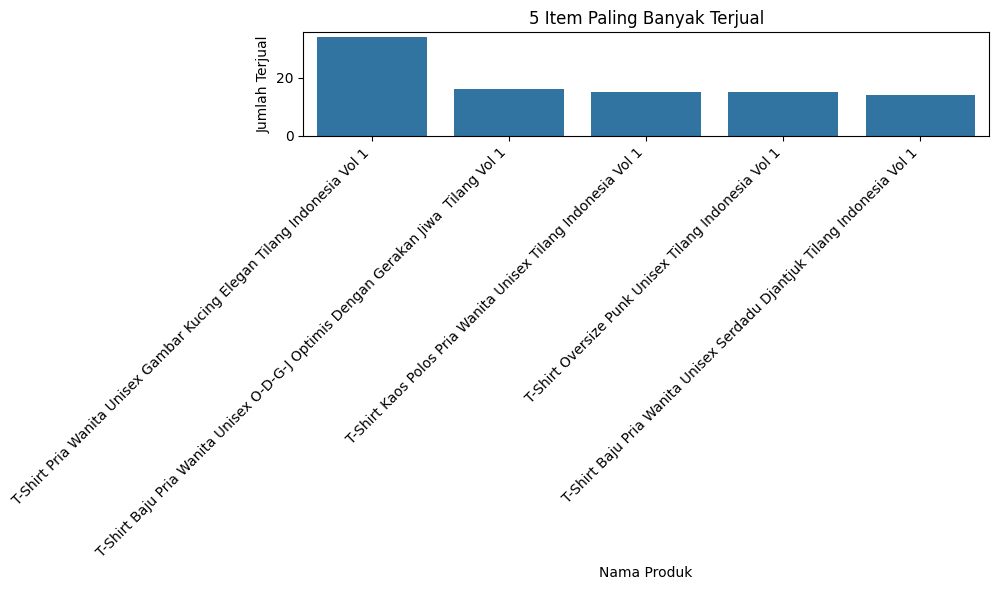

In [92]:
# Menghitung jumlah item terjual per nama produk
item_counts = df_cleaned['Product Name'].value_counts().nlargest(5)

# Membuat histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=item_counts.index, y=item_counts.values)
plt.title('5 Item Paling Banyak Terjual')
plt.xlabel('Nama Produk')
plt.ylabel('Jumlah Terjual')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-93-a4b62bb13062>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.index, y=item_counts.values, palette=colors)


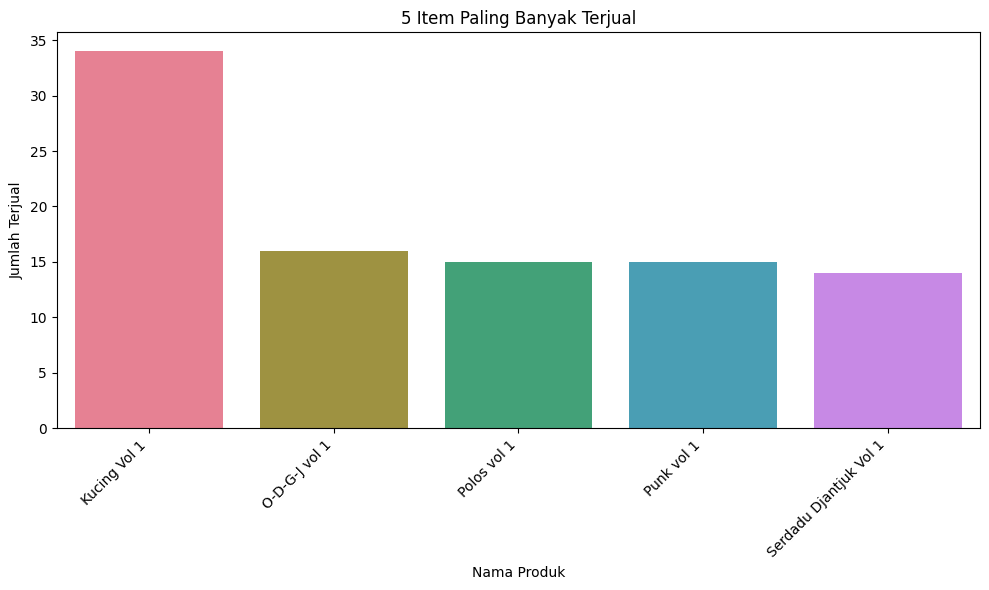

In [93]:
# Mengganti nama produk
item_counts.index = ['Kucing Vol 1', 'O-D-G-J vol 1', 'Polos vol 1', 'Punk vol 1', 'Serdadu Djantjuk Vol 1']

# Membuat histogram dengan warna-warni
plt.figure(figsize=(10, 6))
colors = sns.color_palette('husl', len(item_counts))
sns.barplot(x=item_counts.index, y=item_counts.values, palette=colors)
plt.title('5 Item Paling Banyak Terjual')
plt.xlabel('Nama Produk')
plt.ylabel('Jumlah Terjual')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Melihat grafik penjualan

### Ekstraksi ata

In [94]:
# Ekstrak tanggal dari kolom 'Created Time'
df_cleaned['Created Time'] = pd.to_datetime(df_cleaned['Created Time'])
df_cleaned['Tanggal'] = df_cleaned['Created Time'].dt.date

# Filter data untuk periode Juni-Juli 2024
start_date = pd.to_datetime('2024-06-01').date()
end_date = pd.to_datetime('2024-07-31').date()
filtered_df = df_cleaned[(df_cleaned['Tanggal'] >= start_date) & (df_cleaned['Tanggal'] <= end_date)]

<ipython-input-94-833ecd9aec53>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S	 format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cleaned['Created Time'] = pd.to_datetime(df_cleaned['Created Time'])
<ipython-input-94-833ecd9aec53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Created Time'] = pd.to_datetime(df_cleaned['Created Time'])
<ipython-input-94-833ecd9aec53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Grafik Penjualan Berdasarkan Hari

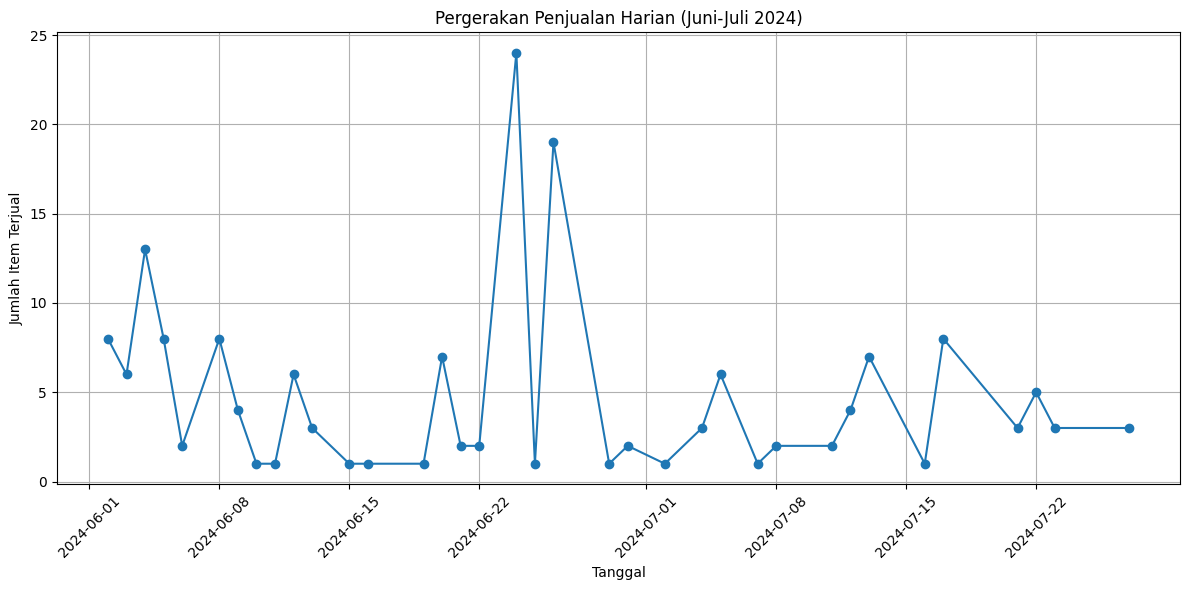

In [95]:
# Hitung jumlah item terjual per hari
daily_sales = filtered_df.groupby('Tanggal')['Quantity'].sum()

# Plot grafik pergerakan penjualan harian
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Item Terjual')
plt.title('Pergerakan Penjualan Harian (Juni-Juli 2024)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Grafik Penjualan Berdasarkan Pekan

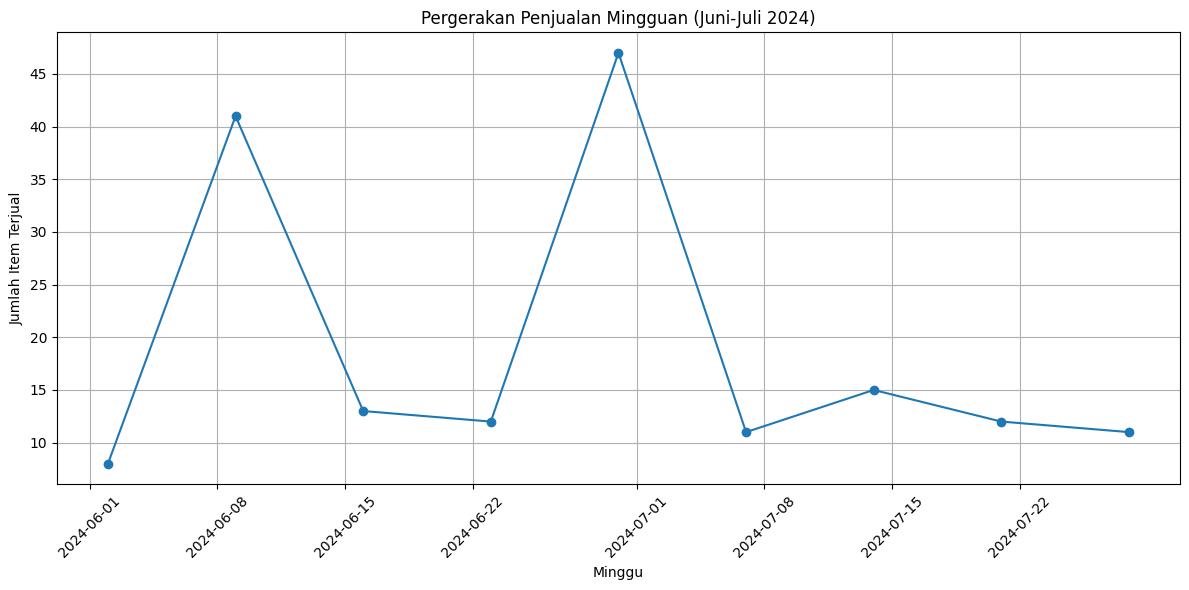

In [96]:
# Hitung jumlah item terjual per minggu
weekly_sales = filtered_df.resample('W', on='Created Time')['Quantity'].sum()

# Plot grafik pergerakan penjualan mingguan
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o')
plt.xlabel('Minggu')
plt.ylabel('Jumlah Item Terjual')
plt.title('Pergerakan Penjualan Mingguan (Juni-Juli 2024)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Grafik Penjualan Berdasarkan Bulan

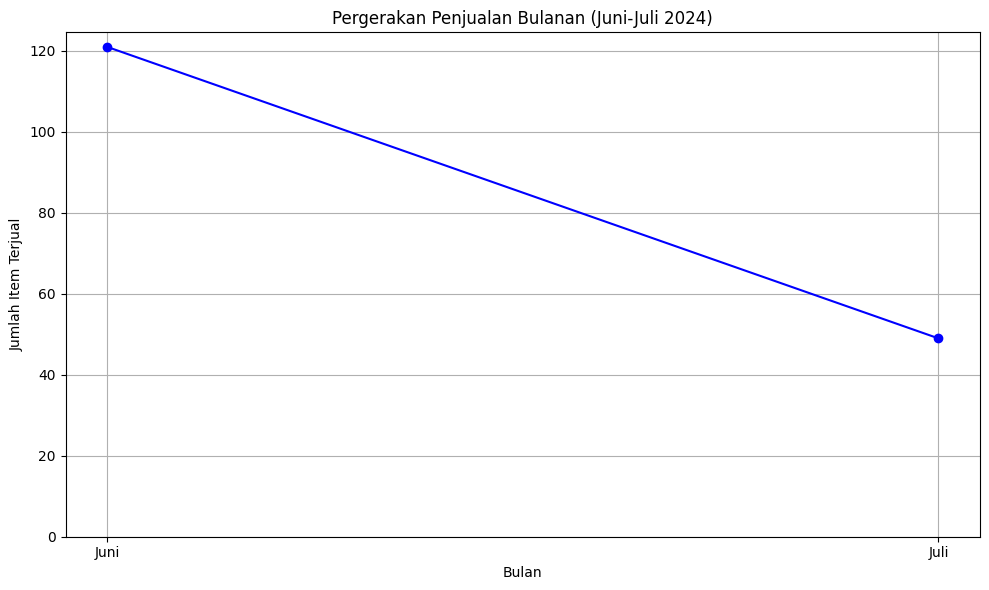

In [97]:
# Hitung jumlah item terjual per bulan
monthly_sales = filtered_df.resample('M', on='Created Time')['Quantity'].sum()

# Buat label bulan yang lebih informatif
month_names = ['Juni', 'Juli']

# Plot grafik pergerakan penjualan bulanan
plt.figure(figsize=(10, 6))
plt.plot(month_names, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Item Terjual')
plt.title('Pergerakan Penjualan Bulanan (Juni-Juli 2024)')
plt.grid(True)
plt.ylim(bottom=0)  # Pastikan sumbu y dimulai dari 0
plt.tight_layout()
plt.show()


<ipython-input-98-ec17911f324e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette=colors)


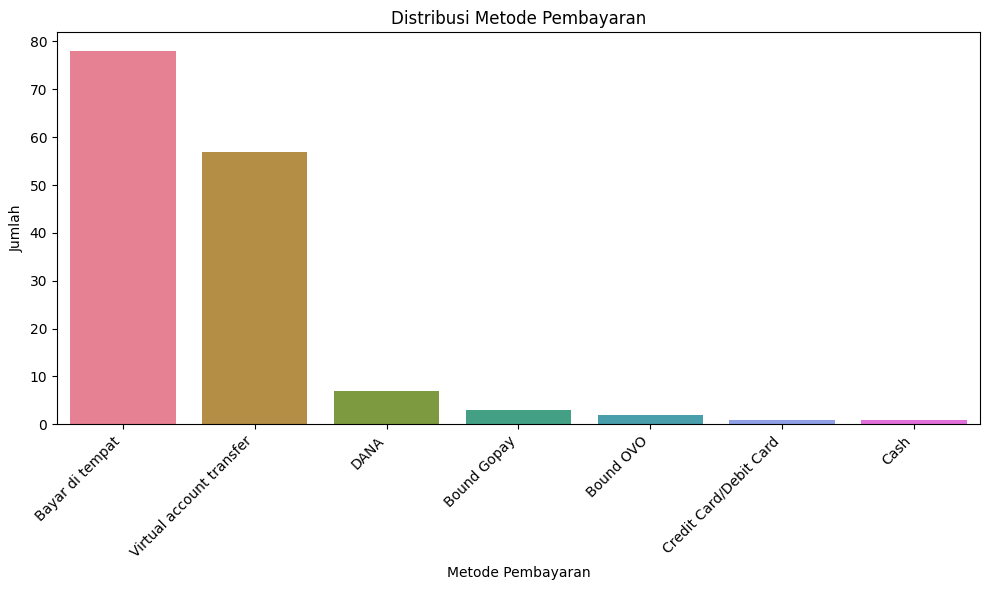

In [98]:
# Menghitung jumlah setiap metode pembayaran
payment_counts = df_cleaned['Payment Method'].value_counts()

# Membuat histogram dengan warna berbeda
plt.figure(figsize=(10, 6))
colors = sns.color_palette('husl', len(payment_counts))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette=colors)
plt.title('Distribusi Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Implementasi Supervised Learning

Dilakukan untuk memprediksi jumlah penjualan apabila melakukan strategi yang sama

## Feature Engineering

In [99]:
# Membuat kolom baru untuk bulan
df_cleaned['Bulan'] = df_cleaned['Created Time'].dt.month

# Membuat kolom baru untuk tahun
df_cleaned['Tahun'] = df_cleaned['Created Time'].dt.year

# Mengelompokkan data berdasarkan bulan dan tahun, lalu menjumlahkan penjualan
monthly_sales = df_cleaned.groupby(['Tahun', 'Bulan'])['Quantity'].sum().reset_index()

<ipython-input-99-3bf9368ca79d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Bulan'] = df_cleaned['Created Time'].dt.month
<ipython-input-99-3bf9368ca79d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Tahun'] = df_cleaned['Created Time'].dt.year


## Model Training

In [100]:
# Memisahkan fitur (X) dan target (y)
X = monthly_sales[['Tahun', 'Bulan']]
y = monthly_sales['Quantity']

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Modelling

In [101]:
# Membuat model Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

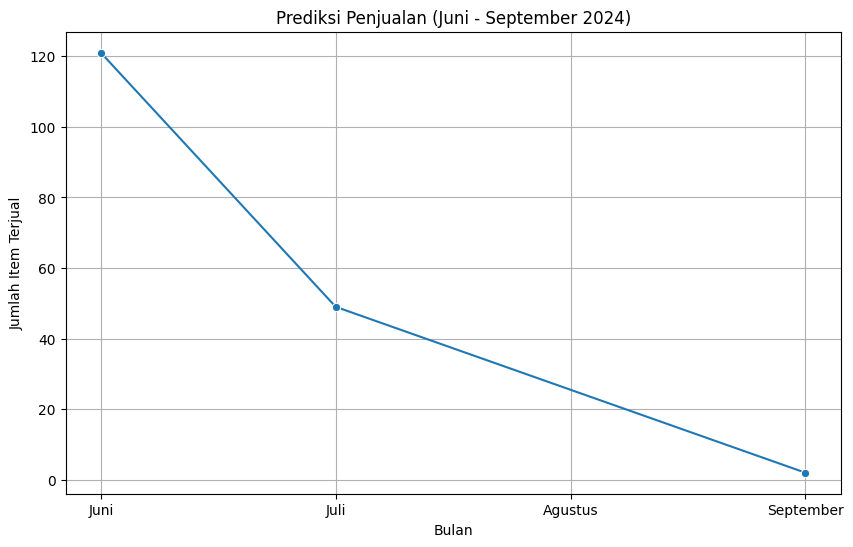

In [102]:
# Membuat data untuk prediksi (Agustus dan September 2024)
new_data = pd.DataFrame({
    'Tahun': [2024, 2024],
    'Bulan': [8, 9]
})

# Melakukan prediksi
predictions = model.predict(new_data)

# Menggabungkan data asli dan prediksi
all_data = pd.concat([monthly_sales, new_data], ignore_index=True)
all_data['Quantity'] = all_data['Quantity'].fillna(pd.Series(predictions))

# Plot grafik lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Bulan', y='Quantity', data=all_data, marker='o')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Item Terjual')
plt.title('Prediksi Penjualan (Juni - September 2024)')
plt.xticks(range(6, 10), ['Juni', 'Juli', 'Agustus', 'September'])
plt.grid(True)
plt.show()


## Evaluasi Random Forest

In [103]:
# 1. Mean Squared Error (MSE)
mse = mean_squared_error(y_test, model.predict(X_test))
print('Mean Squared Error:', mse)

# 2. Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)
print('Root Mean Squared Error:', rmse)

# 3. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, model.predict(X_test))
print('Mean Absolute Error:', mae)

# 4. R-squared
r2 = r2_score(y_test, model.predict(X_test))
print('R-squared:', r2)


Mean Squared Error: 4319.1184
Root Mean Squared Error: 65.72
Mean Absolute Error: 65.72
R-squared: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Support Vector Regression (SVR) Modelling

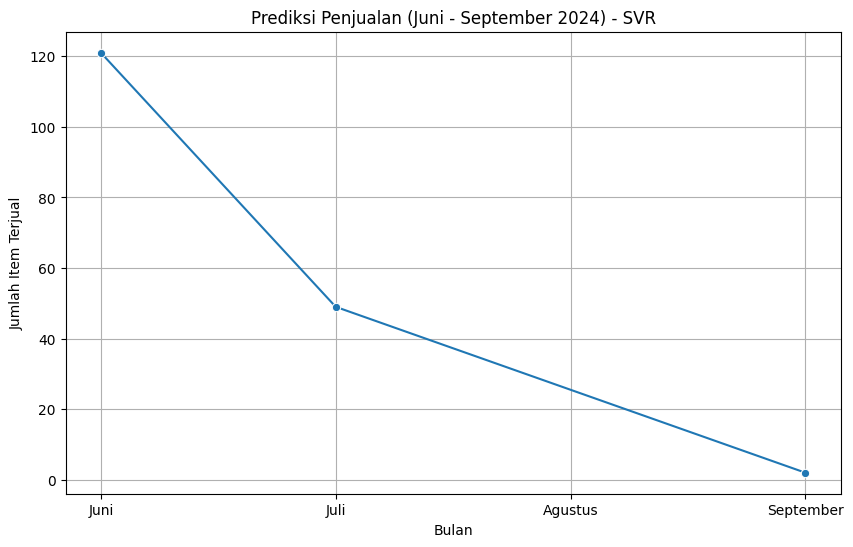

In [104]:
# Membuat model SVR
model_svr = SVR(kernel='linear')  # Anda dapat mencoba kernel lain seperti 'rbf' atau 'poly'

# Melatih model
model_svr.fit(X_train, y_train)

# Melakukan prediksi
predictions_svr = model_svr.predict(new_data)

# Menggabungkan data asli dan prediksi
all_data_svr = pd.concat([monthly_sales, new_data], ignore_index=True)
all_data_svr['Quantity'] = all_data_svr['Quantity'].fillna(pd.Series(predictions_svr))

# Plot grafik lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Bulan', y='Quantity', data=all_data_svr, marker='o')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Item Terjual')
plt.title('Prediksi Penjualan (Juni - September 2024) - SVR')
plt.xticks(range(6, 10), ['Juni', 'Juli', 'Agustus', 'September'])
plt.grid(True)
plt.show()

## Evaluasi SVR

In [105]:
# 1. Mean Squared Error (MSE)
mse_svr = mean_squared_error(y_test, model_svr.predict(X_test))
print('Mean Squared Error (SVR):', mse_svr)

# 2. Root Mean Squared Error (RMSE)
rmse_svr = mean_squared_error(y_test, model_svr.predict(X_test), squared=False)
print('Root Mean Squared Error (SVR):', rmse_svr)

# 3. Mean Absolute Error (MAE)
mae_svr = mean_absolute_error(y_test, model_svr.predict(X_test))
print('Mean Absolute Error (SVR):', mae_svr)

# 4. R-squared
r2_svr = r2_score(y_test, model_svr.predict(X_test))
print('R-squared (SVR):', r2_svr)

Mean Squared Error (SVR): 6480.25
Root Mean Squared Error (SVR): 80.5
Mean Absolute Error (SVR): 80.5
R-squared (SVR): nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Gradient Boosting Modelling

In [106]:
# Membuat model Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Melatih model
model_gb.fit(X_train, y_train)

# Melakukan prediksi
predictions_gb = model_gb.predict(new_data)

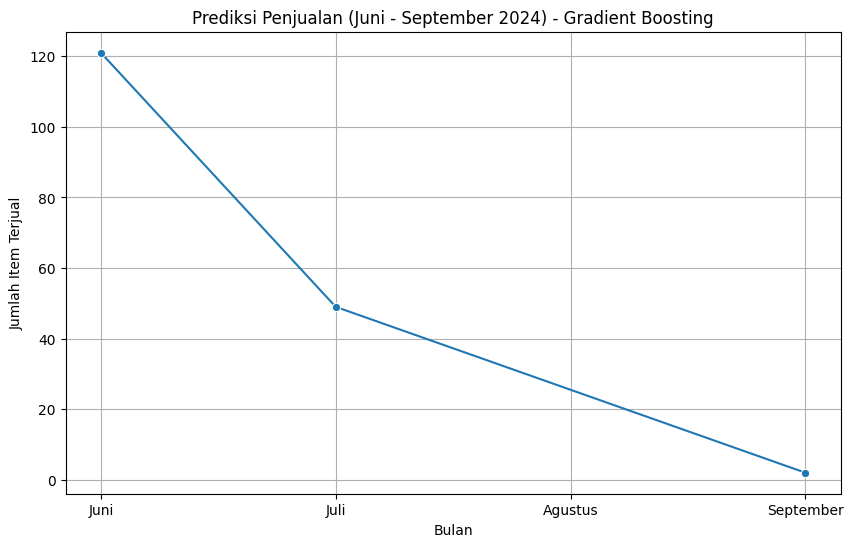

In [107]:
# Menggabungkan data asli dan prediksi
all_data_gb = pd.concat([monthly_sales, new_data], ignore_index=True)
all_data_gb['Quantity'] = all_data_gb['Quantity'].fillna(pd.Series(predictions_gb))

# Plot grafik lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Bulan', y='Quantity', data=all_data_gb, marker='o')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Item Terjual')
plt.title('Prediksi Penjualan (Juni - September 2024) - Gradient Boosting')
plt.xticks(range(6, 10), ['Juni', 'Juli', 'Agustus', 'September'])
plt.grid(True)
plt.show()

## Evaluasi Gradient Boosting

In [108]:
# 1. Mean Squared Error (MSE)
mse_gb = mean_squared_error(y_test, model_gb.predict(X_test))
print('Mean Squared Error (Gradient Boosting):', mse_gb)

# 2. Root Mean Squared Error (RMSE)
rmse_gb = mean_squared_error(y_test, model_gb.predict(X_test), squared=False)
print('Root Mean Squared Error (Gradient Boosting):', rmse_gb)

# 3. Mean Absolute Error (MAE)
mae_gb = mean_absolute_error(y_test, model_gb.predict(X_test))
print('Mean Absolute Error (Gradient Boosting):', mae_gb)

# 4. R-squared
r2_gb = r2_score(y_test, model_gb.predict(X_test))
print('R-squared (Gradient Boosting):', r2_gb)

Mean Squared Error (Gradient Boosting): 2209.0898846881737
Root Mean Squared Error (Gradient Boosting): 47.00095621035995
Mean Absolute Error (Gradient Boosting): 47.00095621035995
R-squared (Gradient Boosting): nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Comparing

In [110]:
 # Membuat DataFrame untuk perbandingan
evaluation_df = pd.DataFrame({
    'Model': ['Random Forest', 'SVR', 'Gradient Boosting'],
    'MSE': [mse, mse_svr, mse_gb],
    'RMSE': [rmse, rmse_svr, rmse_gb],
    'MAE': [mae, mae_svr, mae_gb],
    'R-squared': [r2, r2_svr, r2_gb]
})

# Menampilkan tabel perbandingan
print(evaluation_df)


               Model          MSE       RMSE        MAE  R-squared
0      Random Forest  4319.118400  65.720000  65.720000        NaN
1                SVR  6480.250000  80.500000  80.500000        NaN
2  Gradient Boosting  2209.089885  47.000956  47.000956        NaN
